# Employee Evaluation for Promotion using ML and Eval Auto ML

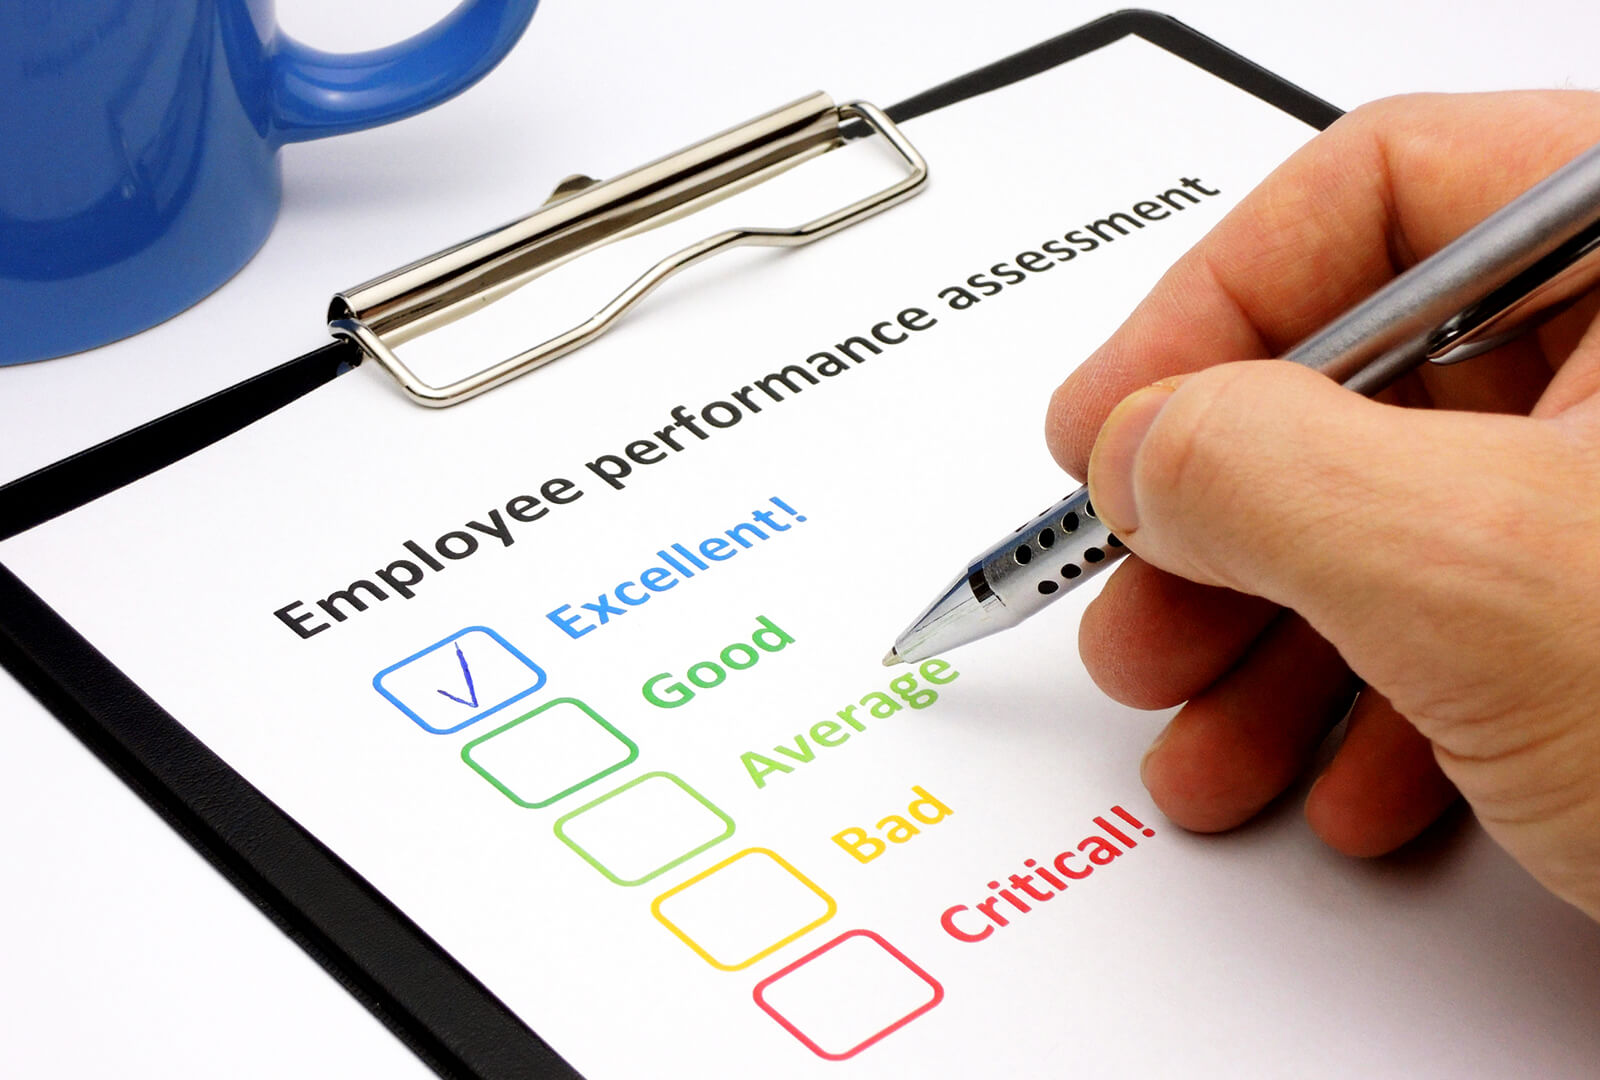

## Context:

### The HR team stored data of promotion cycle last year, which consists of details of all the employees in the company working last year and also if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.


### We will build a model from stored data, that will predict if a person is eligible for promotion or not.

### Time Line of the Project:
- Importing Libraries and DataSet
- Data Analysis
- Feature Engineering
- Model building using ML models
- Model building and prediction using Auto ML

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
!pip install scikit-learn==0.24
!pip install evalml

     |████████████████████████████████| 22.3 MB 1.9 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1


     |████████████████████████████████| 6.4 MB 4.4 MB/s 
     |████████████████████████████████| 1.6 MB 44.6 MB/s 
     |████████████████████████████████| 2.0 MB 41.0 MB/s 
     |████████████████████████████████| 9.8 MB 28.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
     |████████████████████████████████| 26.5 MB 1.3 MB/s 
     |████████████████████████████████| 11.2 MB 48.2 MB/s 
     |████████████████████████████████| 564 kB 67.6 MB/s 
     |████████████████████████████████| 15.7 MB 199 kB/s 
     |████████████████████████████████| 79.9 MB 1.2 MB/s 
     |████████████████████████████████| 6.2 MB 24.2 MB/s 
     |████████████████████████████████| 336 kB 57.1 MB/s 
     |████████████████████████████████| 76.3 MB 1.2 MB/s 
     |████████████████████████████████| 82 kB 360 kB/s 
     |████████████████████████████████| 1.0 MB 55.0 MB/s 
     |████████████████████████████████| 1.5 MB 45.5 MB/s 
     |████████████████████████████████| 100 kB 8.8 MB/s 
     |███████████

### Reading the DataSet

In [2]:
df= pd.read_csv("/content/employee_promotion.csv")

In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [5]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


### Data Analysis and Preprocessing

#### Null Values

In [6]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [7]:
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46375,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,49.0,0
46376,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
46377,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
46378,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0


In [8]:
df.drop(columns=['employee_id'], inplace=True)
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


### Deviding features

In [9]:
num_features=[i for i in df.columns if df.dtypes[i]!='object']
num_features

['no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'awards_won',
 'avg_training_score',
 'is_promoted']

In [10]:
cat_features=[i for i in df.columns if df.dtypes[i]=='object']
df[cat_features].nunique()

department              9
region                 34
education               3
gender                  2
recruitment_channel     3
dtype: int64

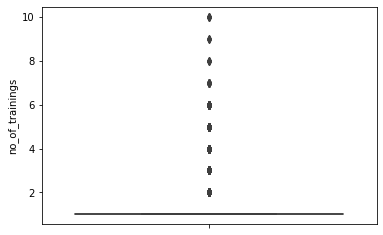

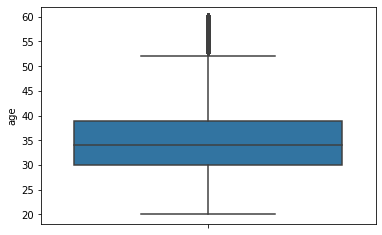

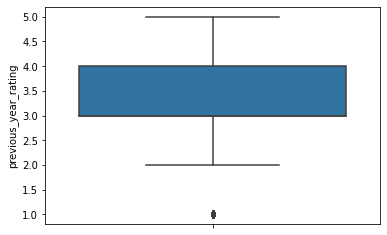

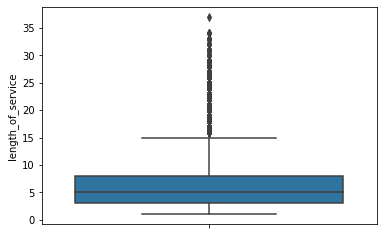

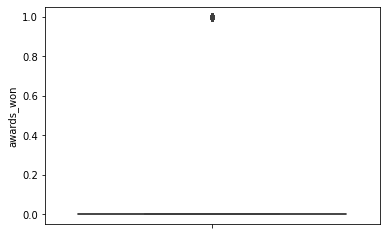

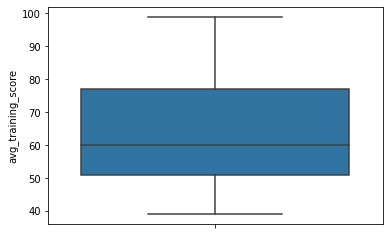

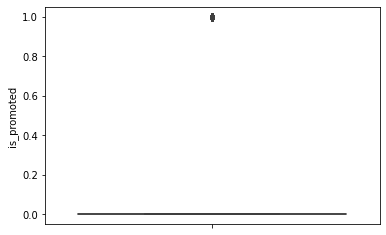

In [11]:
for i in num_features:
    plt.figsize=(10,5)
    sns.boxplot(y=df[i])
    plt.show()

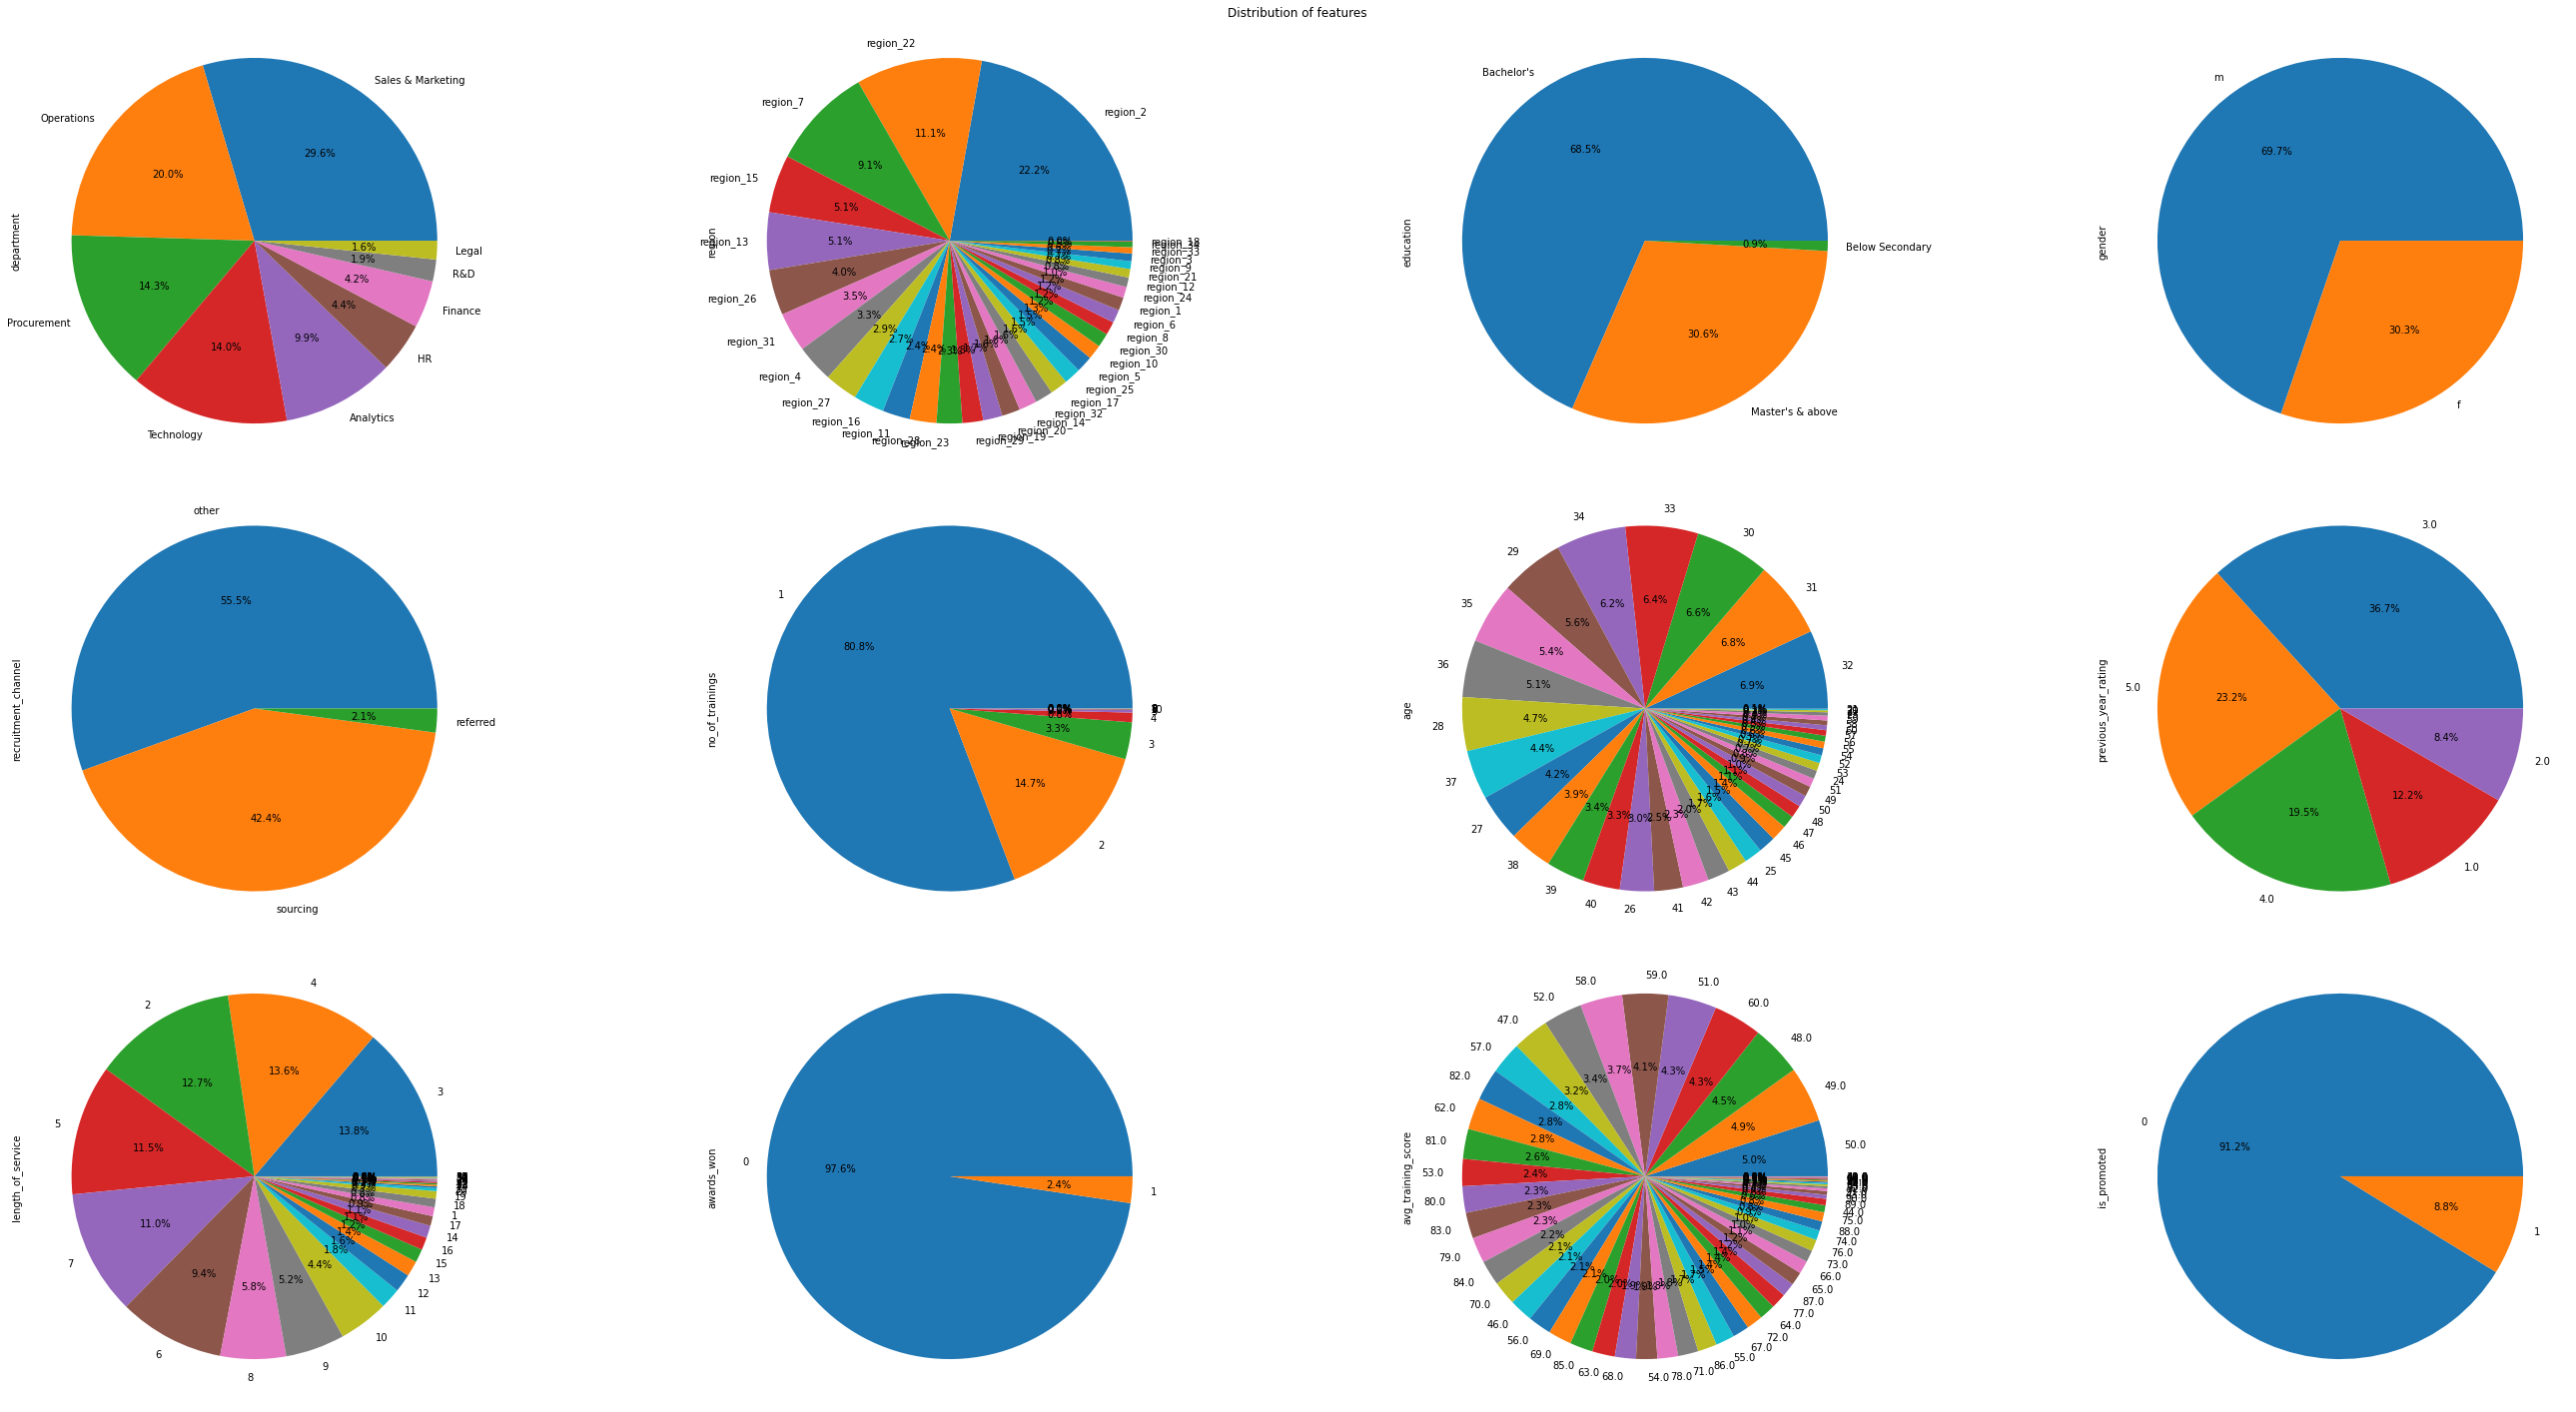

In [12]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(40, 20))

for i, feature in enumerate(df.columns):
    row = int(i/4)
    col = i%4
    pd.value_counts(df.iloc[:, i]).plot.pie(autopct="%.1f%%", ax=axs[row][col])

plt.suptitle('Distribution of features')
plt.tight_layout()

<function matplotlib.pyplot.tight_layout>

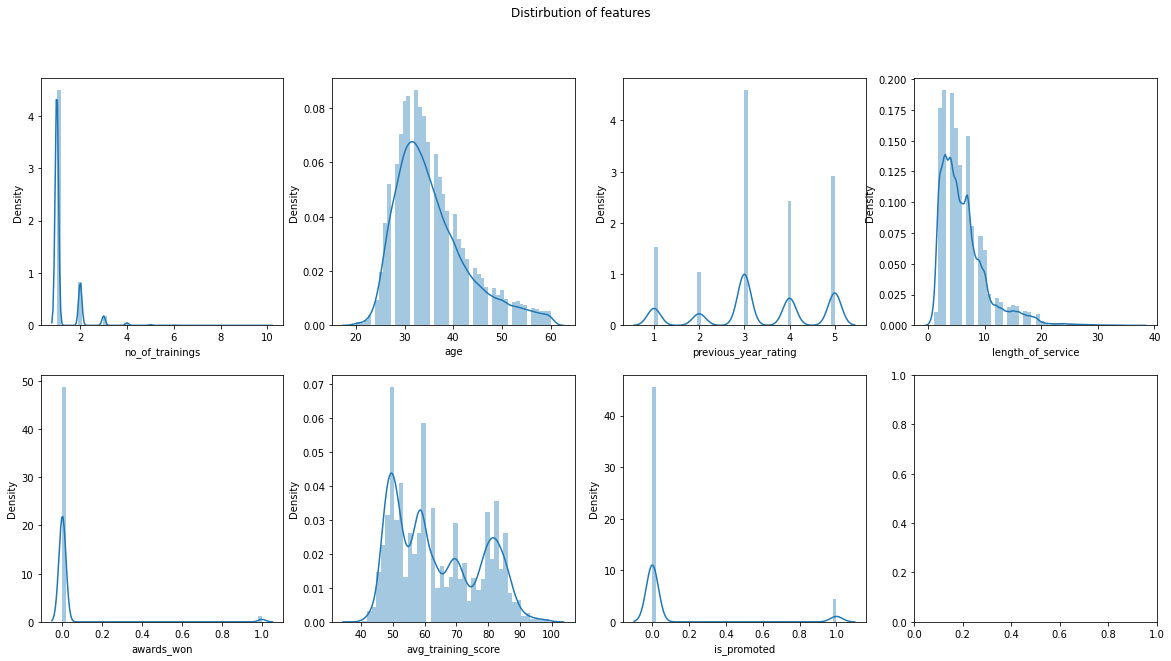

In [14]:
import warnings
warnings.filterwarnings('ignore')
columns = [ 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted']
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, feature in enumerate(df[columns]):
    row = int(i/4)
    col = i%4
    sns.distplot(df[columns].iloc[:, i], ax=axs[row][col])

plt.suptitle('Distirbution of features')
plt.tight_layout

### Plotting Q-Q Plot

In [15]:
import scipy.stats as stat
import pylab

In [16]:
def plot_curve(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

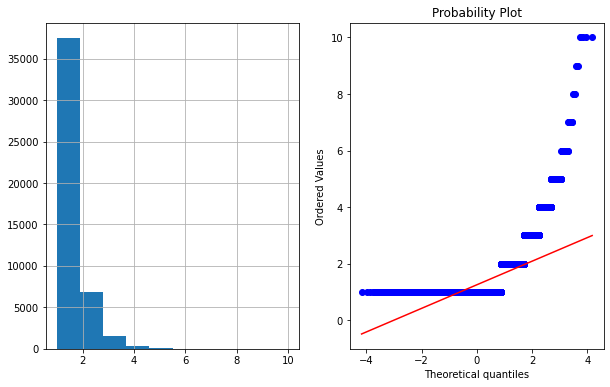

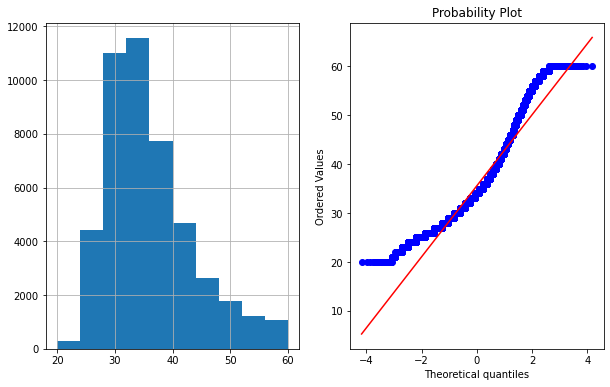

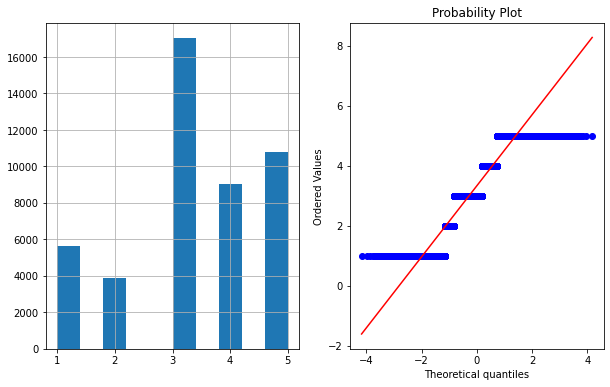

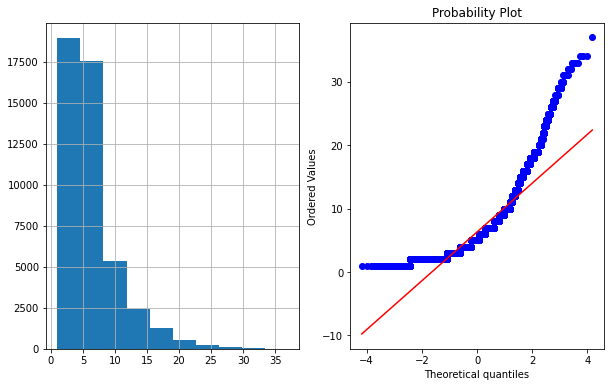

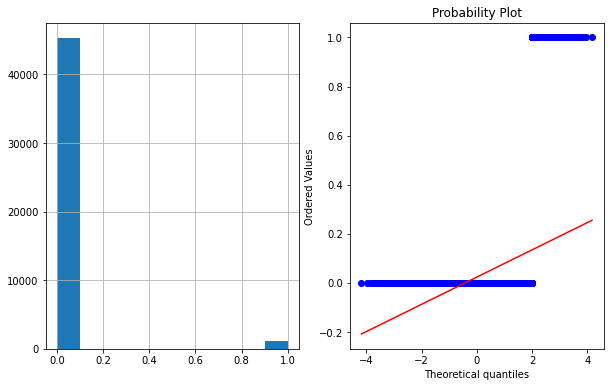

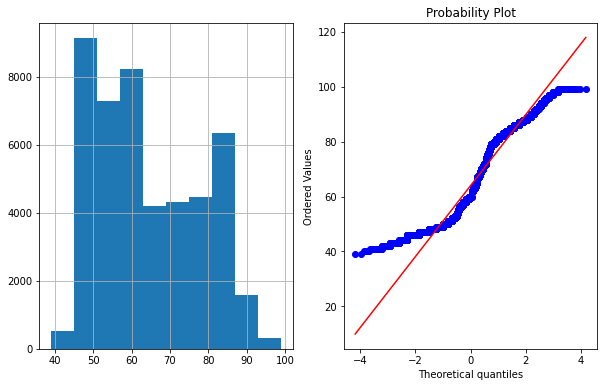

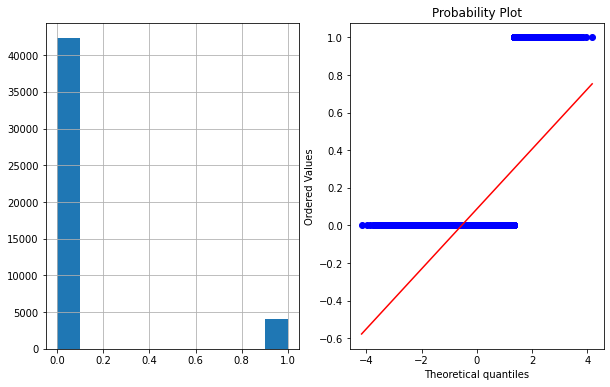

In [17]:
for feature in columns:
    plot_curve(df,feature)

### We need to do log transformation

In [18]:
age_log = np.log1p(df['age'])
service_log = np.log1p(df['length_of_service'])
score_log = np.log1p(df['avg_training_score'])

df.insert(6, 'age_log', age_log)
df.insert(9, 'length_of_service_log', service_log)
df.insert(12, 'avg_training_score_log', score_log)

df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age_log,age,previous_year_rating,length_of_service_log,length_of_service,awards_won,avg_training_score_log,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,3.583519,35,5.0,2.197225,8,0,3.912023,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,3.433987,30,5.0,1.609438,4,0,4.110874,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,3.555348,34,3.0,2.079442,7,0,3.931826,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,3.688879,39,1.0,2.397895,10,0,3.931826,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,3.828641,45,3.0,1.098612,2,0,4.304065,73.0,0


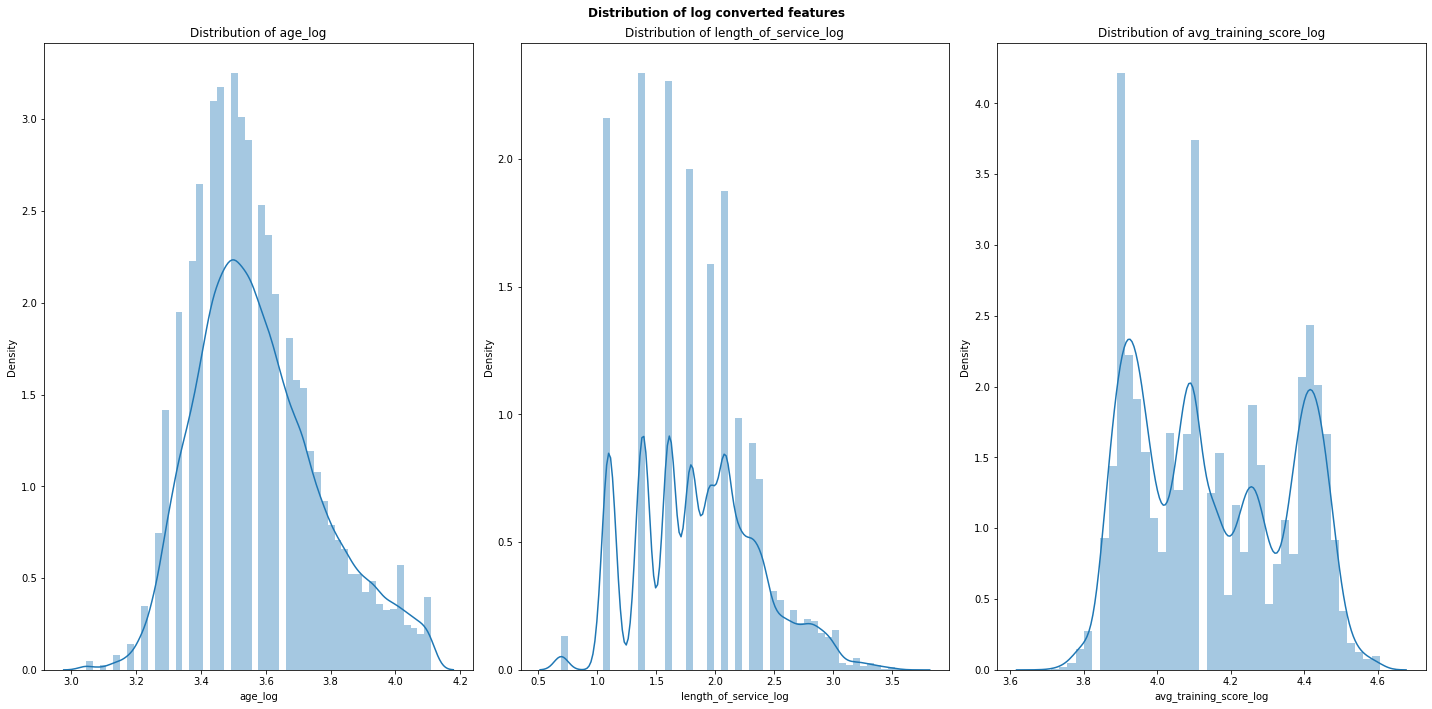

In [19]:
log_columns = ['age_log', 'length_of_service_log', 'avg_training_score_log']

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

sns.distplot(df['age_log'], ax=ax1)
ax1.set_title('Distribution of age_log')
sns.distplot(df['length_of_service_log'], ax=ax2)
ax2.set_title('Distribution of length_of_service_log')
sns.distplot(df['avg_training_score_log'], ax=ax3)
ax3.set_title('Distribution of avg_training_score_log')

plt.suptitle('Distribution of log converted features', fontweight='bold')
plt.tight_layout()
plt.show()

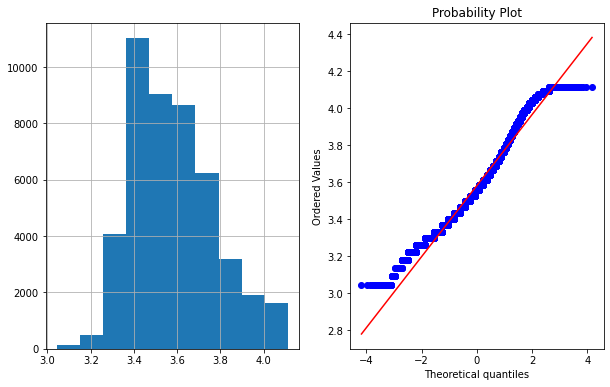

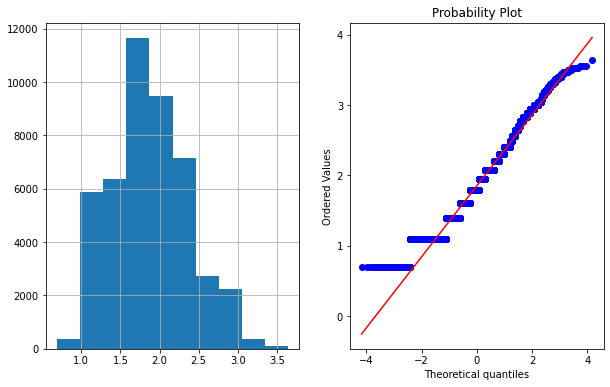

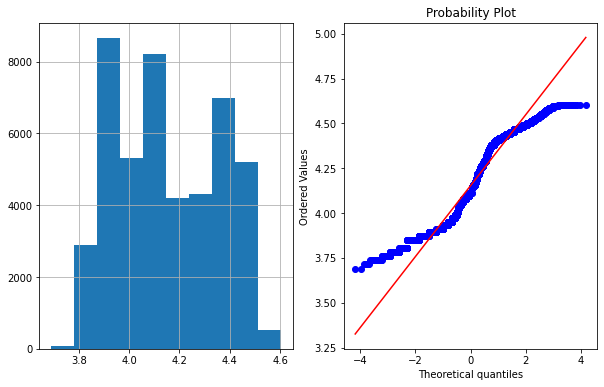

In [20]:
for feature in log_columns:
    plot_curve(df,feature)

#### Heat Map

<AxesSubplot:title={'center':'Correlation of features'}>

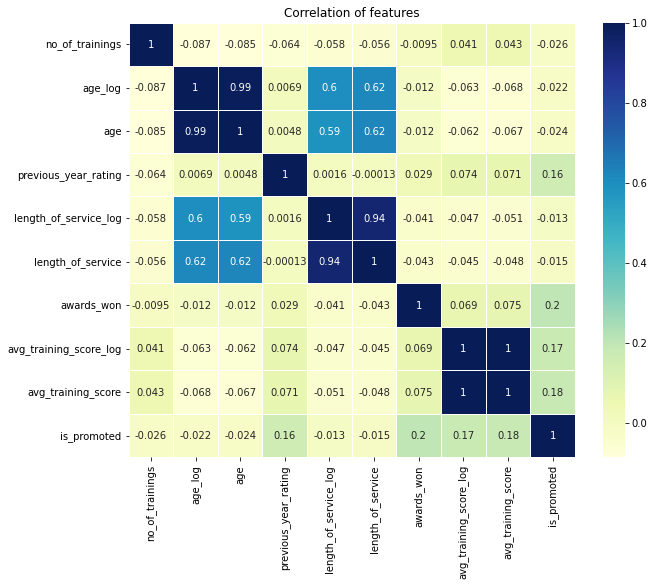

In [21]:
plt.figure(figsize=(10, 8))
plt.title('Correlation of features')
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap="YlGnBu")

### One Hot Encoding

In [22]:
df_encoded = pd.get_dummies(df)
df_encoded.head()

,no_of_trainings,age_log,age,previous_year_rating,length_of_service_log,length_of_service,awards_won,avg_training_score_log,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,3.583519,35,5.0,2.197225,8,0,3.912023,49.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
1,1,3.433987,30,5.0,1.609438,4,0,4.110874,60.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,1,3.555348,34,3.0,2.079442,7,0,3.931826,50.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
3,2,3.688879,39,1.0,2.397895,10,0,3.931826,50.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
4,1,3.828641,45,3.0,1.098612,2,0,4.304065,73.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0


### Scaling our Data

In [23]:
from sklearn.preprocessing import StandardScaler
features = np.array(df_encoded.columns).reshape(-1, 1)

for feature in features:
    scaler = StandardScaler()
    scaler.fit(df_encoded[feature])
    df_encoded[feature] = scaler.transform(df_encoded[feature])

df_encoded.head()

,no_of_trainings,age_log,age,previous_year_rating,length_of_service_log,length_of_service,awards_won,avg_training_score_log,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,-0.418611,0.019377,-0.076052,1.324653,0.673784,0.402667,-0.155136,-1.177045,-1.111888,-0.310195,-0.332214,-0.208992,-0.215593,-0.129502,-0.499427,-0.408726,-0.140114,1.543595,-0.403791,-0.108231,-0.114579,-0.158027,-0.092206,-0.231284,-0.127159,-0.232214,-0.167109,-0.125662,-0.022274,-0.131468,-0.5339,-0.127857,-0.087074,-0.354235,-0.152270,-0.098871,-0.12316,-0.204799,-0.173477,-0.155354,-0.136798,-0.082428,-0.111646,-0.190062,-0.12628,-0.0745,-0.072423,-0.185384,-0.121435,-0.108942,3.169047,-0.109043,-0.083089,-1.474410,-0.09548,1.505848,1.518245,-1.518245,-1.117074,-0.146768,1.166064
1,-0.418611,-0.749600,-0.740379,1.324653,-0.474482,-0.549239,-0.155136,-0.202848,-0.292548,-0.310195,-0.332214,-0.208992,-0.215593,-0.129502,2.002294,-0.408726,-0.140114,-0.647838,-0.403791,-0.108231,-0.114579,-0.158027,-0.092206,-0.231284,-0.127159,-0.232214,-0.167109,-0.125662,-0.022274,-0.131468,-0.5339,-0.127857,-0.087074,2.822986,-0.152270,-0.098871,-0.12316,-0.204799,-0.173477,-0.155354,-0.136798,-0.082428,-0.111646,-0.190062,-0.12628,-0.0745,-0.072423,-0.185384,-0.121435,-0.108942,-0.315552,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,0.895195,-0.146768,-0.857586
2,-0.418611,-0.125493,-0.208918,-0.263965,0.443690,0.164690,-0.155136,-1.080029,-1.037403,-0.310195,-0.332214,-0.208992,-0.215593,-0.129502,-0.499427,-0.408726,-0.140114,1.543595,-0.403791,-0.108231,-0.114579,-0.158027,-0.092206,-0.231284,-0.127159,-0.232214,-0.167109,-0.125662,-0.022274,7.606436,-0.5339,-0.127857,-0.087074,-0.354235,-0.152270,-0.098871,-0.12316,-0.204799,-0.173477,-0.155354,-0.136798,-0.082428,-0.111646,-0.190062,-0.12628,-0.0745,-0.072423,-0.185384,-0.121435,-0.108942,-0.315552,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,-1.117074,-0.146768,1.166064
3,1.226184,0.561202,0.455409,-1.852582,1.065803,0.878619,-0.155136,-1.080029,-1.037403,-0.310195,-0.332214,-0.208992,-0.215593,-0.129502,-0.499427,-0.408726,-0.140114,1.543595,-0.403791,-0.108231,-0.114579,-0.158027,-0.092206,-0.231284,-0.127159,-0.232214,-0.167109,-0.125662,-0.022274,-0.131468,-0.5339,-0.127857,-0.087074,-0.354235,6.567298,-0.098871,-0.12316,-0.204799,-0.173477,-0.155354,-0.136798,-0.082428,-0.111646,-0.190062,-0.12628,-0.0745,-0.072423,-0.185384,-0.121435,-0.108942,-0.315552,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,0.895195,-0.146768,-0.857586
4,-0.418611,1.279937,1.252601,-0.263965,-1.472401,-1.025192,-0.155136,0.743621,0.675764,-0.310195,-0.332214,-0.208992,-0.215593,-0.129502,-0.499427,-0.408726,-0.140114,-0.647838,2.476528,-0.108231,-0.114579,-0.158027,-0.092206,-0.231284,-0.127159,-0.232214,-0.167109,-0.125662,-0.022274,-0.131468,-0.5339,-0.127857,-0.087074,-0.354235,-0.152270,-0.098871,-0.12316,4.882826,-0.173477,-0.155354,-0.136798,-0.082428,-0.111646,-0.190062,-0.12628,-0.0745,-0.072423,-0.185384,-0.121435,-0.108942,-0.315552,-0.109043,-0.083089,0.678237,-

### Spllitting the data

In [24]:
x = df_encoded.drop(columns=['is_promoted'], inplace=False)
y = df_encoded['is_promoted'].astype(int)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

In [26]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (37104, 60)
Shape of X_test:  (9276, 60)
Shape of y_train:  (37104,)
Shape of y_test:  (9276,)


## Model Development:

### We will use the following models in this project:
- Decison Tree Classifier
- Random Forest Classifer 
- Logistci Regression

### Let us define a function which will give the different accuracy matrics

In [27]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, confusion_matrix, f1_score, precision_recall_curve, roc_curve, plot_roc_curve, plot_precision_recall_curve

In [28]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average="macro")
    recall = recall_score(y_test, pred, average="macro")
    f1 = f1_score(y_test, pred, average="macro")
    roc_auc = roc_auc_score(y_test, pred_proba, average="macro")
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Decision Tree

In [30]:
dt_clf = DecisionTreeClassifier()

In [31]:
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)[:, 1]

In [32]:
get_clf_eval(y_test, dt_pred, dt_pred_proba)

Confusion Matrix
[[7869  604]
 [ 428  375]]
Accuracy: 0.8887, Precision: 0.6657, Recall 0.6979, F1: 0.6797, AUC:0.6977


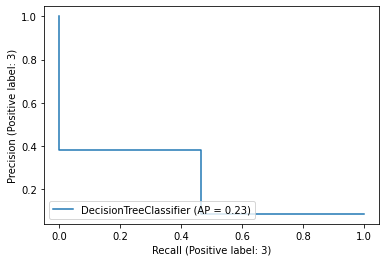

In [33]:
plot_precision_recall_curve(dt_clf, X_test, y_test)

## Logistic Regression

In [34]:
lr_clf = LogisticRegression()

In [35]:
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

In [36]:
get_clf_eval(y_test, lr_pred, lr_pred_proba)

Confusion Matrix
[[8458   15]
 [ 515  288]]
Accuracy: 0.9429, Precision: 0.9466, Recall 0.6784, F1: 0.7452, AUC:0.8070


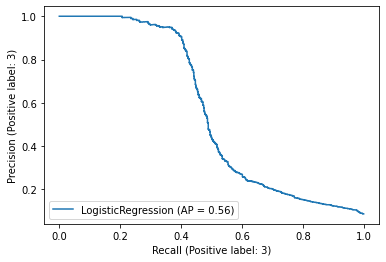

In [37]:
plot_precision_recall_curve(lr_clf, X_test, y_test)

## Random Forest

In [38]:
rf_clf = RandomForestClassifier()

In [39]:
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

In [40]:
get_clf_eval(y_test, rf_pred, rf_pred_proba)

Confusion Matrix
[[8443   30]
 [ 517  286]]
Accuracy: 0.9410, Precision: 0.9237, Recall 0.6763, F1: 0.7399, AUC:0.7987


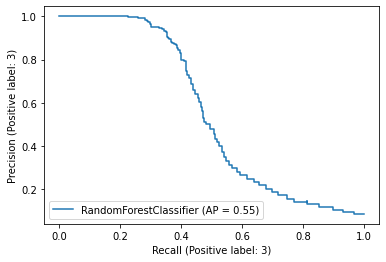

In [41]:
plot_precision_recall_curve(rf_clf, X_test, y_test)

## Using Auto ML

# EVAL ML : 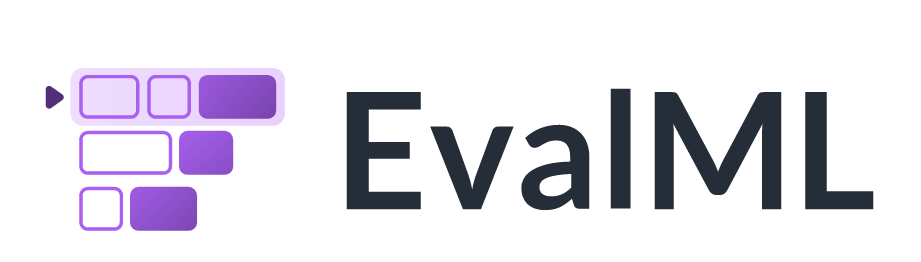

### EvalML is an open-source AutoML library written in python that automates a large part of the machine learning process and we can easily evaluate which machine learning pipeline works better for the given set of data.

### We will use the same train and test dataset for this

In [42]:
import evalml

In [43]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

In [44]:
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(x, y, problem_type='binary')

**Running the Auto ML to select best Algorithm**

In [45]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()

In [46]:
automl.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,4,LightGBM Classifier w/ Label Encoder + Imputer...,4,0.237507,0.002139,0.239780,92.166210,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,3,XGBoost Classifier w/ Label Encoder + Imputer ...,3,0.238883,0.001431,0.240522,92.120815,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,2,Logistic Regression Classifier w/ Label Encode...,2,0.253244,0.001468,0.253796,91.647156,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,1,Elastic Net Classifier w/ Label Encoder + Impu...,1,0.253848,0.001195,0.254194,91.627205,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,6,Random Forest Classifier w/ Label Encoder + Im...,6,0.292398,0.000482,0.292495,90.355692,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,8,Extra Trees Classifier w/ Label Encoder + Impu...,8,0.305198,0.001301,0.306253,89.933517,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,7,Decision Tree Classifier w/ Label Encoder + Im...,7,0.382490,0.010597,0.388244,87.384148,False,"{'Label Encoder': {'positive_label': None}, 'I..."
7,5,CatBoost Classifier w/ Label Encoder + Imputer...,5,0.519197,0.002189,0.520576,82.875092,False,"{'Label Encoder': {'positive_label': None}, 'I..."
8,0,Mode Baseline Binary Classification Pipeline,0,3.031824,0.001612,3.029962,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [47]:
automl.best_pipeline
best_pipeline=automl.best_pipeline

In [48]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


*****************************************************************
* LightGBM Classifier w/ Label Encoder + Imputer + Undersampler *
*****************************************************************

Problem Type: binary
Model Family: LightGBM

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. Undersampler
	 * sampling_ratio : 0.25
	 * min_samples : 100
	 * min_percentage : 0.1
	 * sampling_ratio_dict : None
4. LightGBM Classifier
	 * boosting_type : gbdt
	 * learning_rate : 0.1
	 * n_estimators : 100
	 * max_depth : 0
	 * num_leaves : 31
	 * min_child_samples : 20
	 * n_jobs : -1
	 * bagging_freq : 0
	 * bagging_fraction : 0.9

Training
Training for binary problems.
Total training time (including CV): 51.1 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  

### Predicting the results

In [49]:
evalml.objectives.get_all_objective_names()

['expvariance',
 'maxerror',
 'medianae',
 'mse',
 'mae',
 'r2',
 'mean squared log error',
 'root mean squared log error',
 'root mean squared error',
 'mean absolute percentage error',
 'mcc multiclass',
 'log loss multiclass',
 'auc weighted',
 'auc macro',
 'auc micro',
 'recall weighted',
 'recall macro',
 'recall micro',
 'precision weighted',
 'precision macro',
 'precision micro',
 'f1 weighted',
 'f1 macro',
 'f1 micro',
 'balanced accuracy multiclass',
 'accuracy multiclass',
 'mcc binary',
 'log loss binary',
 'gini',
 'auc',
 'recall',
 'precision',
 'f1',
 'balanced accuracy binary',
 'accuracy binary',
 'sensitivity at low alert rates',
 'lead scoring',
 'fraud cost',
 'cost benefit matrix']

In [50]:
best_pipeline.score(X_test, y_test,objectives=["accuracy binary"])

OrderedDict([('Accuracy Binary', 0.9401681759379042)])

### We can save and load our model in pickle file also

In [51]:
best_pipeline.save("model.pkl")
final_model=automl.load('model.pkl')

In [52]:
pred=final_model.predict(X_test)

In [53]:
pred

40585    0
15718    0
42264    0
46363    0
37567    0
        ..
18784    0
7713     0
11045    0
40741    0
43894    0
Name: is_promoted, Length: 9276, dtype: int64

In [54]:
y_test

40585    0
15718    0
42264    0
46363    0
37567    0
        ..
18784    0
7713     0
11045    0
40741    0
43894    0
Name: is_promoted, Length: 9276, dtype: int64